In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2024-04-13 16:56:49--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2024-04-13 16:56:50--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca33c93d07a34f14c869eab89eb.dl.dropboxusercontent.com/cd/0/inline/CQ8LE74dtXHPcKmugVmvfIo5Sq9OByMNQ3VKdgJWHCdXDqK3WGsrnTiLZssqvdxc-3XRGfgECvaA-T8nfFOgN-RJ2vF9l5oNU54w6Txbski-eCUUcsAfIt8kSEn3VNoY1Di09XMhASbsFG1WObpj3vuj/file# [following]
--2024-04-13 16:56:50--  https://uca33c93d07a34f14c869eab89eb.dl.dropboxusercontent.com/cd/0/inline/CQ8LE74dtXHPcKmugVmvfIo5Sq9OByMNQ3VKdgJWHCdXDqK3WGsrnTiLZssqvdxc-3XRGfgECvaA-T8nfFOgN-RJ2vF9l5oNU54w

In [2]:
!unzip dataset.zip?dl=0

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.losses import categorical_crossentropy


In [4]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )
for layer in base_model.layers:
  layer.trainable = False
x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)
# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [6]:
#Preparing the data using data generator
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,)
train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 7178 images belonging to 7 classes.


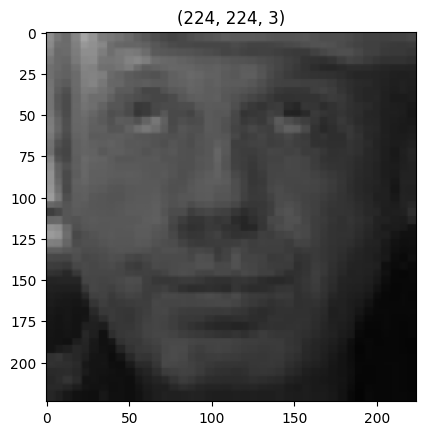

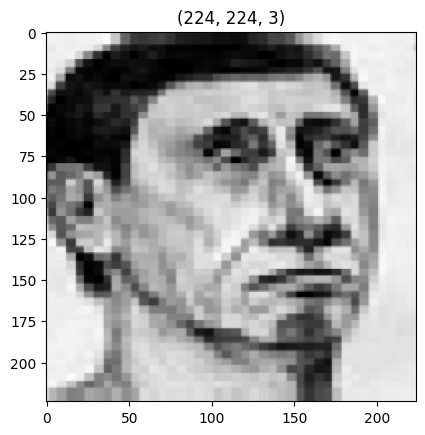

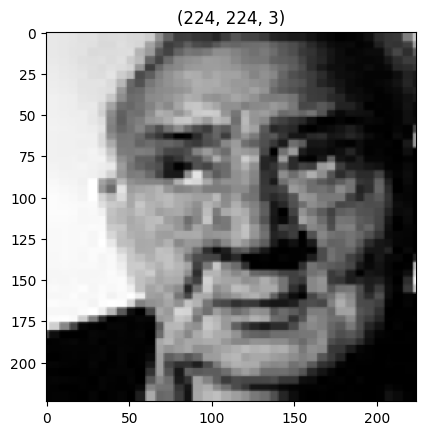

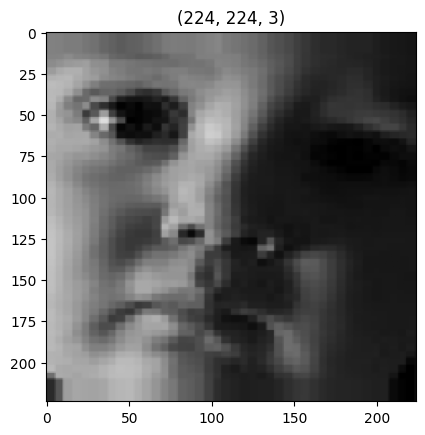

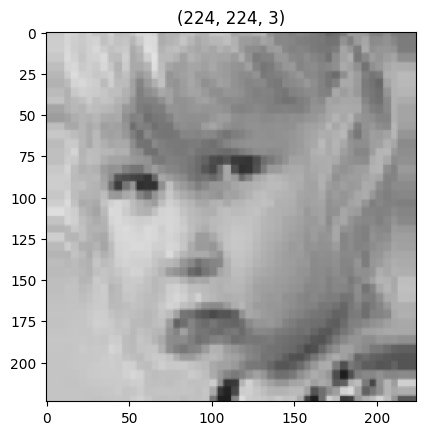

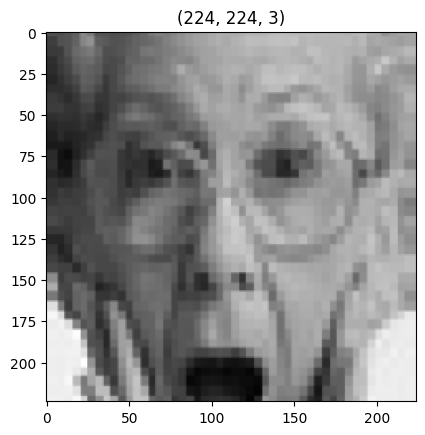

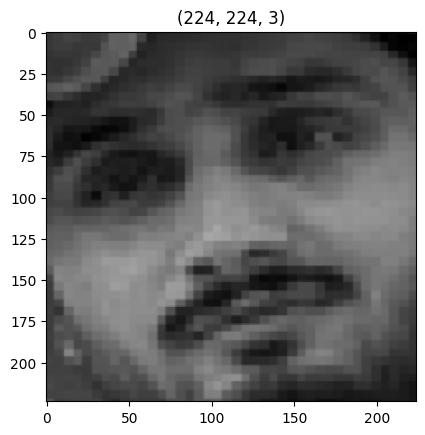

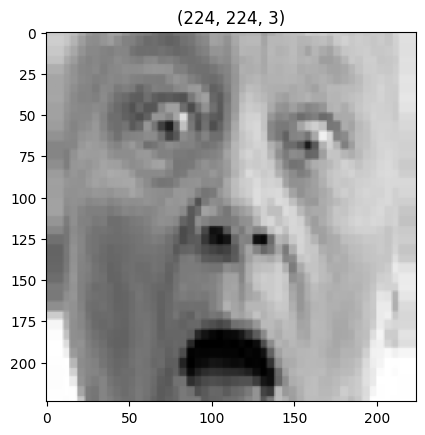

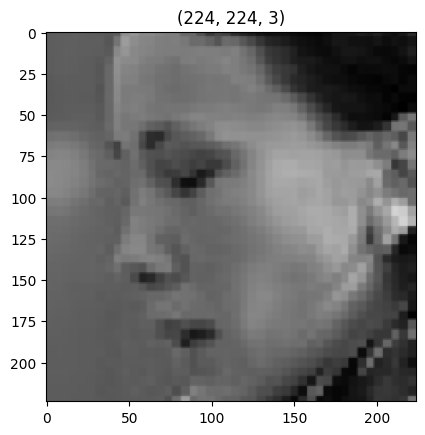

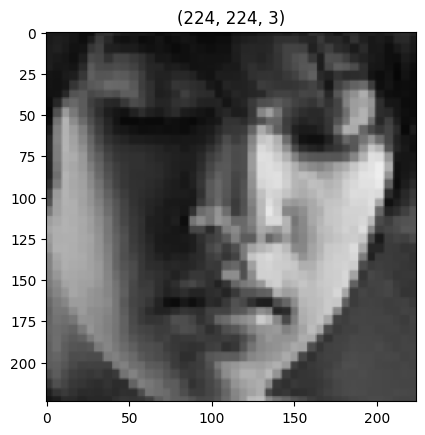

In [8]:
# to visualize the images in the trainng data generator

t_img , label = train_data.next()
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break
#plotting the images
plotImages(t_img, label)

In [9]:
# having early stopping and model check point
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# putting call back in a list
call_back = [es, mc]

In [12]:
hist = model.fit_generator(train_data,
                           steps_per_epoch= 10,
                           epochs= 10,
                           validation_data= val_data,
                           validation_steps= 8,
                           callbacks=[es,mc])

<ipython-input-12-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 6.2761 - accuracy: 0.4406
Epoch 1: val_accuracy did not improve from 0.48047
10/10 [==============================] - 7s 612ms/step - loss: 6.2761 - accuracy: 0.4406 - val_loss: 6.1455 - val_accuracy: 0.4727
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 6.4138 - accuracy: 0.4875
Epoch 2: val_accuracy did not improve from 0.48047
10/10 [==============================] - 4s 382ms/step - loss: 6.4138 - accuracy: 0.4875 - val_loss: 5.5293 - val_accuracy: 0.4453
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 5.4878 - accuracy: 0.4375
Epoch 3: val_accuracy did not improve from 0.48047
10/10 [==============================] - 5s 514ms/step - loss: 5.4878 - accuracy: 0.4375 - val_loss: 7.8737 - val_accuracy: 0.4375
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 6.0046 - accuracy: 0.4656
Epoch 4: val_accuracy did not improve from 0.48047
10/10 [====================

In [13]:
# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [14]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

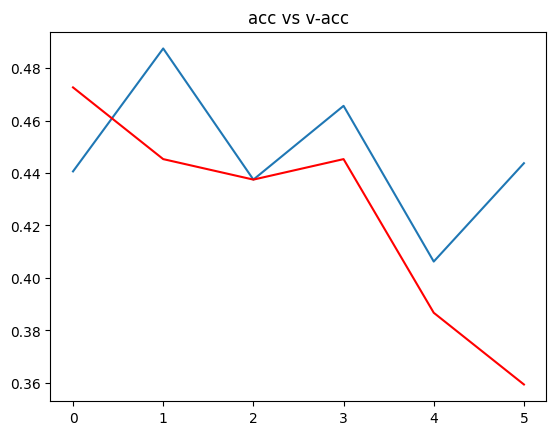

In [15]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

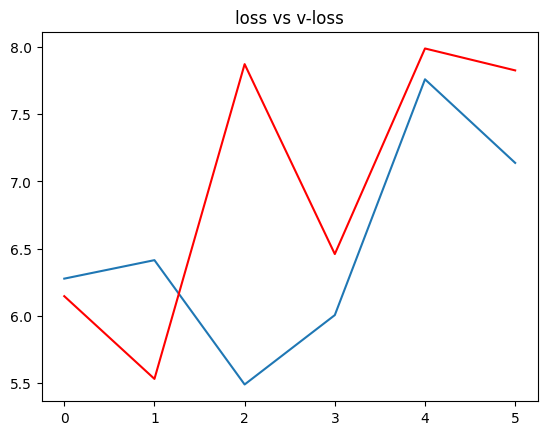

In [16]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [17]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [22]:
ANGRY=['Punching bag workout: "Unleash the storm within. With every strike, let the thunder of your fury echo through the halls of resilience."',
       'Anger journaling: "Ink becomes the battleground, paper the canvas. Let rage flow, transmute into words, and witness anger metamorphosis into clarity."']
DISGUST=['Creative expression:"From repulsion blooms creation. Turn disgust into the seeds of art, where every stroke is a rebellion against the mundane."',
     'Environment cleanup:"Transform revulsion into action. Each cleaned corner is a victory over disdain, a step towards a world worthy of admiration."']
FEAR=['Exposure therapy:"Conquer fear, one step at a time. With each encounter, fear fades and courage rises, a beacon in the night of uncertainty."',
   'Mindfulness meditation:"In the stillness of breath, fear finds its echo. But within that silence lies the strength to face the shadows and emerge unscathed."']
HAPPY=['Gratitude practice: "In the garden of gratitude, happiness blooms. Each whispered thank you is a petal, each cherished moment a blossom of joy."',
       'Random acts of kindness:"In the currency of kindness, happiness finds its value. With each selfless act, we enrich the world and fill our hearts with boundless joy."']
NEUTRAL=['Mindful walking:"In the simplicity of each step lies the essence of neutrality. Walk with intention, embracing the serenity of the present moment."',
         'Engage in a hobby:"In the embrace of a hobby, neutrality finds its rhythm. With each brushstroke, each chord struck, we find solace in the symphony of the ordinary."']
SAD=['Emotional release through art:"Tears become the ink, sadness the canvas. In the gallery of emotion, each stroke is a masterpiece, each sigh a symphony of the soul."',
     'Reach out for support:"In the depths of despair, a hand reaches out. With each shared burden, each whispered word of solace, sadness finds its companion in empathy."']
SURPRISE=['Embrace spontaneity:"The greatest adventures of life lie in the unexpected. Embrace the unknown, dance with spontaneity, and let each surprise be a treasure waiting to be discovered."',
'Try something new:"In the canvas of routine, surprise paints its masterpiece. Dare to venture beyond the familiar, and watch as each new experience becomes a brushstroke of delight."']
l=[ANGRY,DISGUST,FEAR,HAPPY,NEUTRAL,SAD,SURPRISE]

In [28]:
import random
def show_activity(pred_model):
    r_ind=random.randint(1,3)
    if(pred_model=='angry'):
        print(l[0][r_ind-1])
    elif(pred_model=='disgust'):
        print(l[1][r_ind-1])
    elif(pred_model=='fear'):
        print(l[2][r_ind-1])
    elif(pred_model=='happy'):
        print(l[3][r_ind-1])
    elif(pred_model=='neutral'):
        print(l[4][r_ind-1])
    elif(pred_model=='sad'):
        print(l[5][r_ind-1])
    elif(pred_model=='surprise'):
        print(l[6][r_ind-1])

1/1 [==============================] - 0s 20ms/step
EMOTION: neutral


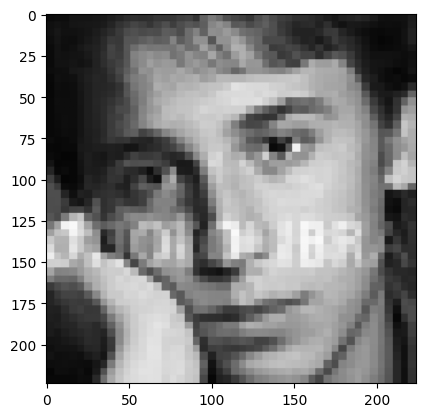

Suggested activity the person can do:
Mindful walking:"In the simplicity of each step lies the essence of neutrality. Walk with intention, embracing the serenity of the present moment."


In [29]:
# path for the image to see if it predics correct class

path = "/content/test/neutral/PrivateTest_10767287.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f"EMOTION: {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.show()
print("Suggested activity the person can do:")
show_activity(op[pred])